In [319]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class my_Perceptron:
    def __init__(self, max_T=50, step_size=0.01):
        self.max_T = max_T
        self.step_size = step_size
        

    def fit(self, X, y):
        self.w = np.ones(len(X.loc[0]))
        self.b = 0
        T=0
        while T <= self.max_T:
            for i in range(len(X)):
                if y.iloc[i]* (np.inner(self.w, X.iloc[i])+self.b) < 0:
                    self.w = self.w + self.step_size*y.iloc[i]*X.iloc[i]
            
            T += 1
                
    
        
    def predict(self, X) :
        scores = np.inner(self.w, X)
        return np.sign(scores)
        

In [320]:
df_ori = pd.read_csv('diabetes.csv')
X=df_ori.loc[:,'Pregnancies':'Age']
y=df_ori.Outcome
for i in range(len(y)):
    if y[i] == 0:
        y[i] = 1
    else:
        y[i] = -1

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('Training dataset: X_train=', X_train.shape, ', y_train', y_train.shape)
print('Testing dataset: X_test=', X_test.shape, ', y_test', y_test.shape)

Training dataset: X_train= (576, 8) , y_train (576,)
Testing dataset: X_test= (192, 8) , y_test (192,)


/Users/davi/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/davi/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


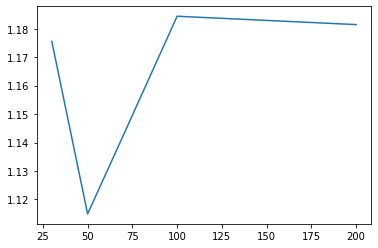

In [321]:
from sklearn.metrics import mean_squared_error
RMSE_list=[]
max_T=[30, 50, 70, 100, 200]
for i in max_T:
    p=my_Perceptron(max_T=i)
    p.fit(X_train, y_train)
    p_pred=p.predict(X_train)
    RMSE=mean_squared_error(p_pred, y_train)
    RMSE=np.sqrt(RMSE)
    RMSE_list.append(RMSE)
plt.plot(max_T, RMSE_list)

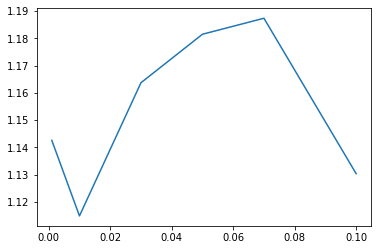

In [329]:
from sklearn.metrics import mean_squared_error
RMSE_list=[]
step_size=[0.001, 0.01, 0.03, 0.05, 0.07, 0.1]
for i in step_size:
    p=my_Perceptron(step_size=i)
    p.fit(X_train, y_train)
    p_pred=p.predict(X_train)
    RMSE=mean_squared_error(p_pred, y_train)
    RMSE=np.sqrt(RMSE)
    RMSE_list.append(RMSE)
plt.plot(step_size, RMSE_list)

In [325]:
p = my_Perceptron()
p.fit(X_train, y_train)

In [326]:
y_predict=p.predict(X_test)

In [328]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7083333333333334

In [331]:
#evaluate the model performance
baseline = np.mean(y)
y_baseline = np.repeat(baseline, len(y_test))

naive_RMSE = mean_squared_error(y_test, y_baseline)
naive_RMSE = np.sqrt(naive_RMSE)
naive_RMSE

0.9598606488849191

In [332]:
y_train_pred = p.predict(X_train)
RMSE_training = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_testing = np.sqrt(mean_squared_error(y_test, y_predict))
print(RMSE_training)
print(RMSE_testing)

1.130388330520878
1.0801234497346435
